<a href="https://colab.research.google.com/github/FusionForce-cloud/Assignment4/blob/main/Exploratory_Data_Analysis_on_Airplane_Crash_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=25ebe01ec353b88a433605f9d99ee4e3230b244ba52d40be5da556c7b710f98f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
import time
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from scipy import stats
from sklearn import metrics
import plotly.express as px
import statsmodels.api as sm
from itertools import product
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import plotly.graph_objects as go
from statsmodels.formula.api import ols
from ydata_profiling import ProfileReport
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
data = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df=data.copy()
df

Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
0                Military - U.S. Army      NaN   
1                Military - U.S. Navy      NaN   
2                             Private        -   
3              Military - German Navy      NaN   
4              Military - German Navy      NaN   
...                               ...      ...   
5263  Military - Indonesian Air Force      NaN   
5264                      Service Air      NaN   
5265                       Air France      447   
5266                       Strait Air      NaN   
5267      Military - Indian Air Force      NaN   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type Registration cn/In  Aboard  Fatalities  \
0                     Wright Flyer III          NaN     1     2.0         1.0   
1                            Dirigible          NaN   NaN     5.0         5.0   
2                     Curtiss seaplane          NaN   NaN     1.0         1.0   
3               Zeppelin L-1 (airship)          NaN   NaN    20.0        14.0   
4               Zeppelin L-2 (airship)          NaN   NaN    30.0        30.0   
...                                ...          ...   ...     ...         ...   
5263           Lockheed C-130 Hercules       A-1325  1982   112.0        98.0   
5264                     Antonov An-26       9Q-CSA  5005     4.0         4.0   
5265                   Airbus A330-203       F-GZCP   660   228.0       228.0   
5266  Britten-Norman BN-2A-27 Islander      C-FJJR    424     1.0         1.0   
5267                     Antonov An-32          NaN   NaN    13.0        13.0   

      Ground                                            Summary  
0        0.0  During a demonstration flight, a U.S. Army fly...  
1        0.0  First U.S. dirigible Akron exploded just offsh...  
2        0.0  The first fatal airplane accident in Canada oc...  
3        0.0  The airship flew into a thunderstorm and encou...  
4        0.0  Hydrogen gas which was being vented was sucked...  
...      ...                                                ...  
5263     2.0  While on approach, the military transport cras...  
5264     NaN  The cargo plane crashed while on approach to I...  
5265     0.0  The Airbus went missing over the AtlantiOcean ...  
5266     0.0  The air ambulance crashed into hills while att...  
5267     0.0  The military transport went missing while en r...  

[5268 rows x 13 columns]

In [6]:
from ydata_profiling import ProfileReport
ProfileReport(df, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

100%|██████████| 13/13 [00:00<00:00, 34.71it/s]


In [7]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [8]:
df.shape

(5268, 13)

In [9]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(5268, 13)

Types
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

NANs
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-n

In [10]:
print('Object Columns:')
for count,column_name in enumerate(df.select_dtypes(include=['object']).columns,1):
    print(f'\t\t\t\t{count}) {column_name}')

Object Columns:
				1) Date
				2) Time
				3) Location
				4) Operator
				5) Flight #
				6) Route
				7) Type
				8) Registration
				9) cn/In
				10) Summary


In [11]:
print('Floating Columns:')
for count,column_name in enumerate(df.select_dtypes(include=['float']).columns,1):
    print(f'\t\t\t\t{count}) {column_name}')

Floating Columns:
				1) Aboard
				2) Fatalities
				3) Ground


In [12]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


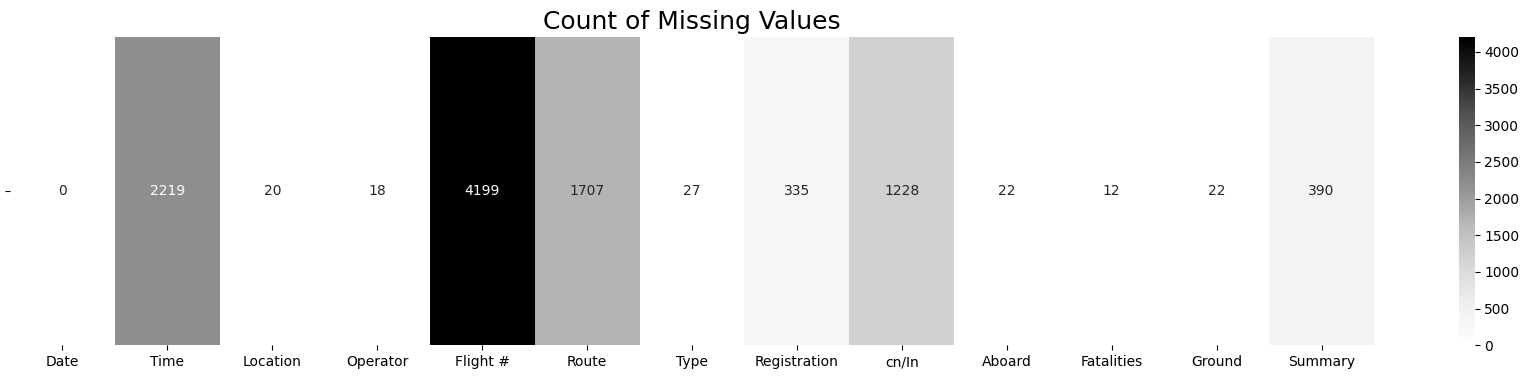

In [13]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='Greys', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

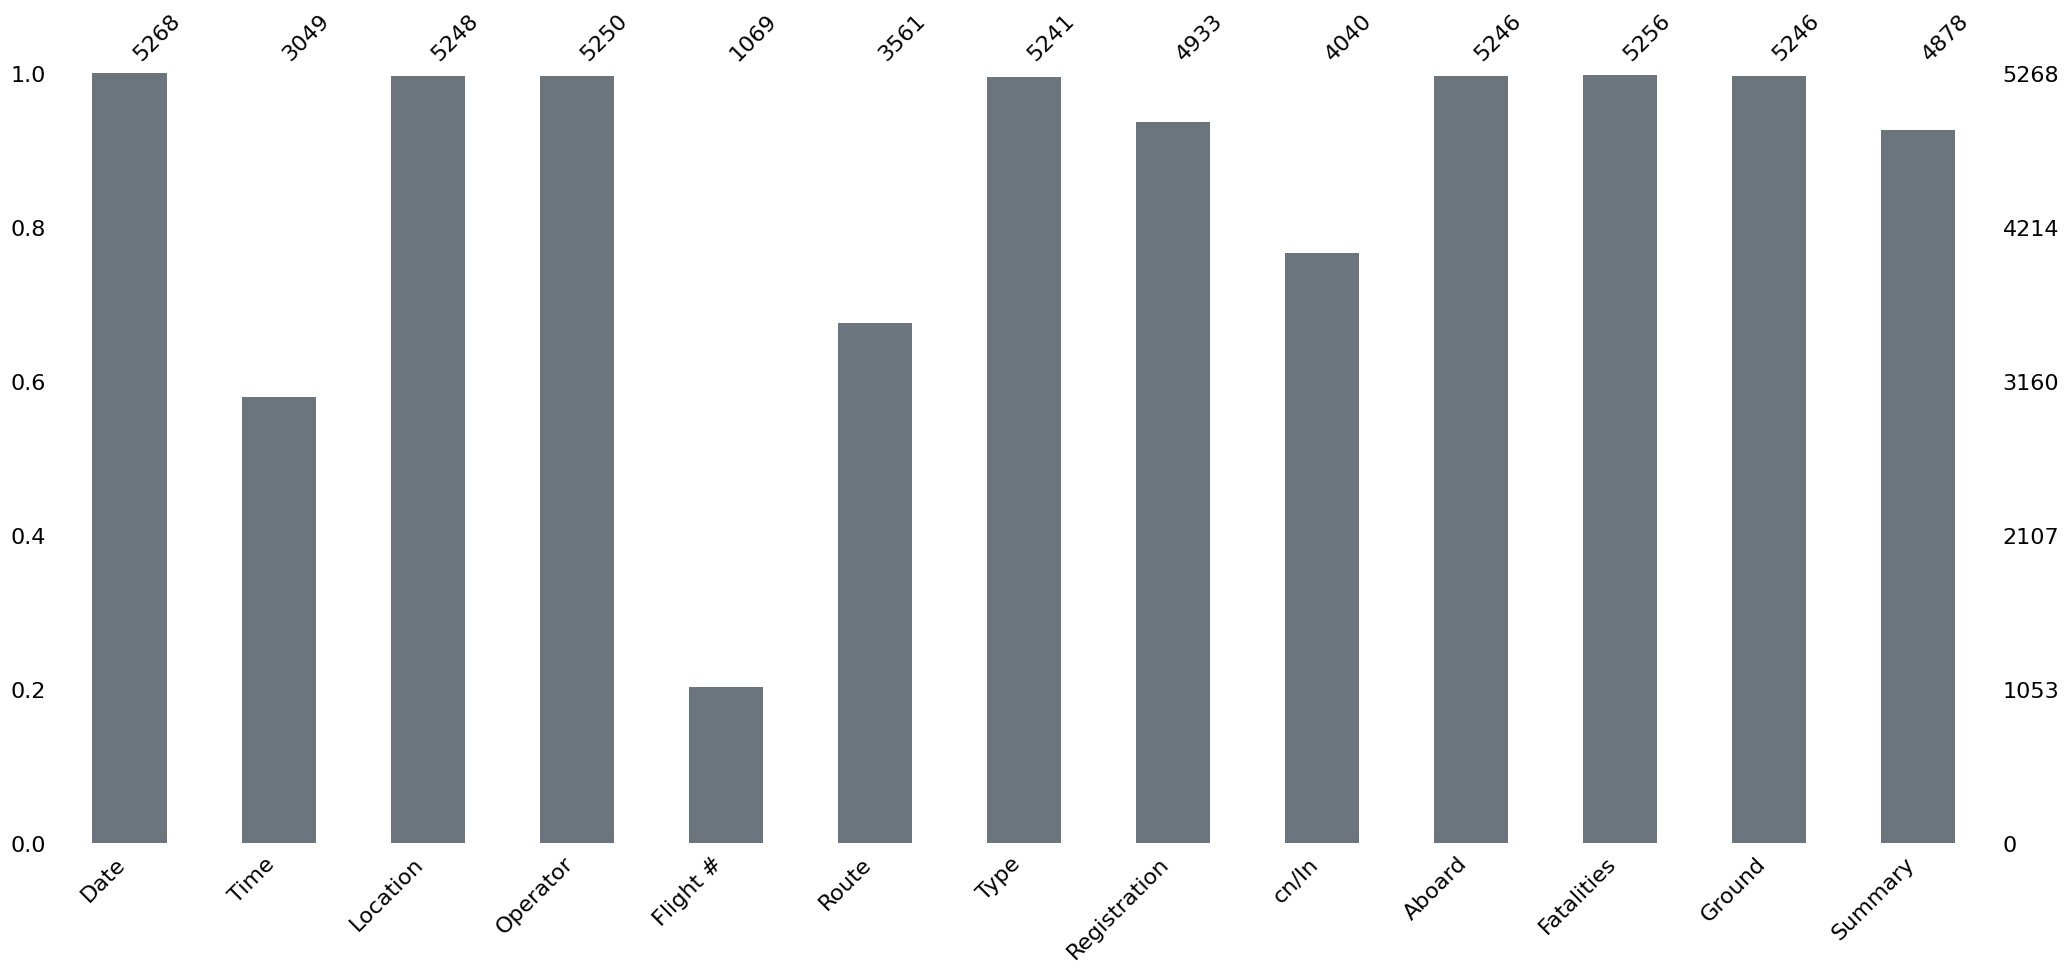

In [14]:
import missingno as msno
msno.bar(df, color='#6c757d')
plt.show()

In [15]:
missing=df.isna().sum()

In [16]:
custom_palette = ['#343a40', '#495057', '#6c757d', '#adb5bd', '#ced4da']
percentage = missing/len(df)*100
percentage.round(2)
threshold =  7.40
per = percentage[percentage>threshold]
fig = px.pie(values=per,names=per.index,color_discrete_sequence=custom_palette)
fig.update_layout(
    title={'text': 'Percentage of top 5 missing values','font': {'size': 20}
           },paper_bgcolor = 'white')

fig.show()

In [17]:
df.describe()[1:].T.style.background_gradient(cmap='Greys', axis=1)

In [18]:
df.select_dtypes(include=['object']).describe().T

count unique                      top freq
Date          5268   4753               09/11/2001    4
Time          3049   1005                    15:00   32
Location      5248   4303           Moscow, Russia   15
Operator      5250   2476                 Aeroflot  179
Flight #      1069    724                        -   67
Route         3561   3243                 Training   81
Type          5241   2446             Douglas DC-3  334
Registration  4933   4905                       49    3
cn/In         4040   3707                      178    6
Summary       4878   4673  Crashed during takeoff.   15

<div style="border-radius:10px; border:#6c757d solid; padding: 15px; background-color:#e9ecef
            ; font-size:110%; text-align:left">
    
- We can see statistical information on the table above.

In [19]:
df.apply(lambda x: len(x.unique()))

Date            4753
Time            1006
Location        4304
Operator        2477
Flight #         725
Route           3244
Type            2447
Registration    4906
cn/In           3708
Aboard           240
Fatalities       192
Ground            51
Summary         4674
dtype: int64

In [20]:
unique = df.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

Number of Unique Values  \
Aboard                            239   
Date                             4753   
Fatalities                        191   
Flight #                          724   
Ground                             50   
Location                         4303   
Operator                         2476   
Registration                     4905   
Route                            3243   
Summary                          4673   
Time                             1005   
Type                             2446   
cn/In                            3707   

                                                  Unique Values  
Aboard        [2.0, 5.0, 1.0, 20.0, 30.0, 41.0, 19.0, 22.0, ...  
Date          [09/17/1908, 07/12/1912, 08/06/1913, 09/09/191...  
Fatalities    [1.0, 5.0, 14.0, 30.0, 21.0, 19.0, 20.0, 22.0,...  
Flight #      [nan, -, 7, 599, 6, 4, 1, 14, 34, 23, 15A, LZ ...  
Ground        [0.0, nan, 1.0, 5.0, 11.0, 2.0, 52.0, 22.0, 20...  
Location      [Fort Myer, Virginia, AtlantiCity, New Jersey,...  
Operator      [Military - U.S. Army, Military - U.S. Navy, P...  
Registration  [nan, 97, 61, 82, 32, G-EAHG, 77, 65, 72, 49, ...  
Route         [Demonstration, Test flight, nan, Varsovie - S...  
Summary       [During a demonstration flight, a U.S. Army fl...  
Time          [17:18, 06:30, nan, 18:30, 10:30, 01:00, 15:20...  
Type          [Wright Flyer III, Dirigible, Curtiss seaplane...  
cn/In         [1, nan, 31, 20, 178, HP-25, R-38, 160, 6116, ...

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [22]:
df['Manufacture'] = df['Type'].apply(lambda x: x.split(' ')[0] if type(x) == str else 'Others')

In [23]:
warnings.filterwarnings("ignore")
df['Location'].fillna('', inplace=True)
df['Flight #'].fillna('Unavailable', inplace=True)
df['Route'].fillna('Unavailable', inplace=True)
df['Place'] = df['Location'].apply(lambda x: x.split(',')[0] if ',' in x else x)
df['Time'].fillna('Unknown',inplace=True)
df['Time'].isnull().any()
df['Operator'].fillna(df['Operator'].mode()[0],inplace = True)
df['cn/In'].fillna('Unknown', inplace=True)
df['Registration'].fillna(df['Registration'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Aboard'].fillna(df['Aboard'].mean(),inplace=True)
df['Fatalities'].fillna(df['Fatalities'].mean(),inplace=True)
df['Ground'].fillna(df['Ground'].mean(),inplace=True)
df['Summary'].fillna('Unknown',inplace=True)
warnings.resetwarnings()

In [24]:
df.describe()[1:].T.style.background_gradient(cmap='Greys', axis=1)

In [25]:
numerical_columns = df.select_dtypes(include=[int,float]).columns
descibe_numerical = df[numerical_columns].describe()
categorical_columns = ['Operator','Type','Manufacture']
frequency_counts = df[categorical_columns].value_counts()
modes = df[categorical_columns].mode()
print('summary statistics')
print(descibe_numerical)
print('\nFrequency Counts')
print(frequency_counts.head(20))
print('\n\n Modes')
print(modes)

summary statistics
            Aboard   Fatalities       Ground        Month         Year
count  5268.000000  5268.000000  5268.000000  5268.000000  5268.000000
mean     27.554518    20.068303     1.608845     6.643888  1971.300304
std      42.986652    33.162110    53.874957     3.546162    22.387541
min       0.000000     0.000000     0.000000     1.000000  1908.000000
25%       5.000000     3.000000     0.000000     3.000000  1954.000000
50%      13.000000     9.000000     0.000000     7.000000  1973.000000
75%      30.000000    23.000000     0.000000    10.000000  1990.000000
max     644.000000   583.000000  2750.000000    12.000000  2009.000000

Frequency Counts
Operator                             Type                      Manufacture
US Aerial Mail Service               De Havilland DH-4         De             26
Aeroflot                             Yakovlev YAK-40           Yakovlev       19
Deutsche Lufthansa                   Junkers JU-52/3m          Junkers        16
Milita

In [26]:
accidents_by_location = df['Location'].value_counts().reset_index()
accidents_by_location.columns=['Location','Accident Count']
top_20_locations = accidents_by_location.head(20)
print(top_20_locations)

                  Location  Accident Count
0                                       20
1        Sao Paulo, Brazil              15
2           Moscow, Russia              15
3   Rio de Janeiro, Brazil              14
4      Manila, Philippines              13
5        Anchorage, Alaska              13
6         Bogota, Colombia              13
7       New York, New York              12
8             Cairo, Egypt              12
9        Chicago, Illinois              11
10            Tehran, Iran               9
11     Near Moscow, Russia               9
12            AtlantiOcean               9
13             Rome, Italy               8
14  Amsterdam, Netherlands               8
15           Paris, France               8
16          Ankara, Turkey               8
17        Denver, Colorado               8
18          Kunming, China               7
19         Cleveland, Ohio               7


In [27]:
accident_types_by_location = df.groupby('Location')['Type'].apply(lambda x: x.value_counts().idxmax()).reset_index()
accident_types_by_location.columns = ['Location','Most Common Accident Type']
accident_types_by_location = accident_types_by_location.head(10)
accident_types_by_location

Location  \
0                                                 
1           1,200 miles off Dakar, AtlantiOcean   
2      100 miles SW of Kuujjuaq, Quebec, Canada   
3                 110 miles SW of Sochi, Russia   
4              200 miles NE of Derby, Australia   
5                    25 nm off Agrigento, Italy   
6        300 nm NW of San Francisco, California   
7  900 miles E of Honolulu, Hawaii, PacifiOcean   
8                   950 nm S of  Shemya, Alaska   
9                       Abakan, Siberia, Russia   

               Most Common Accident Type  
0                       Junkers JU-53/3m  
1            Latecoere 631 (flying boat)  
2                            Cessna 180K  
3                        Tupolev Tu-154M  
4               Robertson R44 helicopter  
5  Vickers Valetta Mk1 / Avero Lancaster  
6                     Boeing B-747-SP-09  
7       Boeing - 377-10-29 Stratocruiser  
8                McDonnell Douglas MD-11  
9                       Ilyushin IL-76MD

In [28]:
accidents_byy_location = df['Location'].value_counts().reset_index()
accidents_byy_location.columns=['Location','Accident Count']
top_locations = accidents_byy_location.head(5268)

In [29]:
warnings.filterwarnings("ignore")
fig = px.choropleth(top_locations, locations='Location', locationmode = "country names", hover_name='Location'
                   ,color_continuous_scale="Gray",color='Accident Count',projection='van der grinten', title='Accident Count By Location')
fig.show()

In [30]:
accidents_byyy_location = df['Location'].value_counts().reset_index()
accidents_byyy_location.columns=['Location','Accident Count']
top = accidents_byyy_location.head(30)

In [31]:
warnings.filterwarnings("ignore")
data = top_20_locations[['Location', 'Accident Count']].sort_values('Accident Count', ascending=False)[:20]
colors = ['#212529', '#343a40', '#495057', '#6C757D', '#ADB5BD', '#CED4DA', '#DEE2E6', '#E9ECEF', '#E9ECEF', '#F8F9FA', '#E9ECEF', '#DEE2E6','#CED4DA','#ADB5BD','#6C757D','#495057','#343a40','#212529','#161a1d','#0b090a']
fig = go.Figure(go.Bar(
            x=data['Accident Count'][::-1],
            y=data['Location'][::-1],
            marker=dict(color=colors),
            text=data['Accident Count'].apply(lambda x:str(int(x)))[::-1],
            textposition='outside',
            orientation='h'))
fig.update_layout(
    title='Top Locations With the highest Accident Count',
    xaxis_title="inflation Size",
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',)
fig.show()
df_sorted = top.sort_values('Accident Count', ascending=False)
top_n = 30
top_countries = df_sorted.head(top_n)
other_inflation = df_sorted.iloc[top_n:]['Accident Count'].sum()
new_df = pd.concat([top_countries, pd.DataFrame({'Location': ['Others'], 'Accident Count': [other_inflation]})])
colors = ['#212529', '#343a40', '#495057', '#6C757D', '#ADB5BD', '#CED4DA', '#DEE2E6', '#E9ECEF', '#E9ECEF', '#F8F9FA', '#E9ECEF', '#DEE2E6','#CED4DA','#ADB5BD','#6C757D','#495057','#343a40','#212529','#161a1d','#0b090a','#212529', '#343a40', '#495057', '#6C757D', '#ADB5BD', '#CED4DA', '#DEE2E6', '#E9ECEF', '#E9ECEF', '#F8F9FA']
fig = go.Figure(data=[go.Pie(labels=new_df['Location'],
                             values=new_df['Accident Count'],
                             textinfo="label+percent",
                             pull=[0, 0, 0],
                             showlegend=False,
                             marker_colors=colors,
                            )])
fig.update_traces(
    hole=0.6)
fig.update_layout(
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)
fig.show()

In [32]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.bar(accident_types_by_location, x='Location', y='Most Common Accident Type',template = 'plotly_white')
fig.update_traces(marker_color='#6c757d')
fig.update_layout(title='Most Common Accident Type by Location',title_x = 0.5)
fig.show()

In [33]:
operator_counts = df['Operator'].value_counts().reset_index().head(25)
operator_counts.columns = ['Operator','Accident Count']
operator_counts

Operator  Accident Count
0                              Aeroflot             197
1             Military - U.S. Air Force             176
2                            Air France              70
3                    Deutsche Lufthansa              65
4                              Air Taxi              44
5   China National Aviation Corporation              44
6                      United Air Lines              44
7       Military - U.S. Army Air Forces              43
8            Pan American World Airways              41
9            Military - Royal Air Force              36
10                 Military - U.S. Navy              36
11               US Aerial Mail Service              36
12                    American Airlines              36
13                      Indian Airlines              34
14             KLM Royal Dutch Airlines              33
15                 Philippine Air Lines              33
16                              Private              31
17                          Aeropostale              26
18            Northwest Orient Airlines              25
19             British Overseas Airways              25
20                    Eastern Air Lines              25
21                               Sabena              24
22                              AVIANCA              24
23                 Military - U.S. Army              23
24            Military -Royal Air Force              22

In [34]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
operator_counts['Accident Count'] = operator_counts['Accident Count'].astype('int')
fig = px.bar(operator_counts,x='Operator', y='Accident Count',template = 'plotly_white')
fig.update_traces(marker_color='#6c757d')
fig.update_layout(title = 'Top 25 Operators With The Most Accidents',title_x=0.5)
print(fig.show())

None


In [35]:
aircraft = df.groupby(['Type','Registration','Manufacture']).size().reset_index()
aircraft.columns = ['Aircraft Type','Registration','Manufacture','Accidents']
aircraft = aircraft.sort_values(by='Accidents',ascending=False)
aircraft.reset_index(inplace=True)
aircraft=aircraft.head(25)
aircraft

index                     Aircraft Type Registration Manufacture  \
0    2251                      Douglas DC-3           49      Others   
1    1902                      Douglas C-47           49     Douglas   
2     228                     Antonov AN-26           49     Antonov   
3    2250                      Douglas DC-3           49     Douglas   
4    1021                        Breguet 14           49     Breguet   
5     135                     Antonov AN-12           49     Antonov   
6    4150             Mil Mi-8 (helicopter)           49         Mil   
7    1669                      Curtiss C-46           49     Curtiss   
8    2830                       Douglas M-4           49     Douglas   
9    3346                    Ilyushin IL-18           49    Ilyushin   
10   4354            Pitcairn PA-6 Mailwing           49    Pitcairn   
11    262                     Antonov AN-32           49     Antonov   
12   2969                    Fairchild FC-2           49   Fairchild   
13   4133                   Mi-8 helicopter           49        Mi-8   
14   4596                   Travel Air 4000           49      Travel   
15    927                      Boeing B-747           49      Boeing   
16   1004  Boeing Vertol CH-47 (helicopter)           49      Boeing   
17   4531                  Stinson SM-6000B           49     Stinson   
18    296                     Antonov An-24           49     Antonov   
19   4205                              PS-1           49        PS-1   
20   4132                              Mi-8           49        Mi-8   
21   4519                    Stearman C-3MB           49    Stearman   
22   4293            Piper PA-31-350 Navajo           49       Piper   
23   5080                de Havilland DH-86       VH-USG          de   
24   4129                             Mi-17           49       Mi-17   

    Accidents  
0          17  
1          16  
2          13  
3          12  
4           9  
5           9  
6           8  
7           6  
8           5  
9           4  
10          4  
11          4  
12          4  
13          3  
14          3  
15          3  
16          3  
17          2  
18          2  
19          2  
20          2  
21          2  
22          2  
23          2  
24          2

In [36]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.bar(aircraft,x='Aircraft Type',y='Accidents',title='Top 25 Aircraft Types By Accidents',template = 'plotly_white')
fig.update_traces(marker_color='#6c757d')
fig.update_layout(title_x = 0.5)
fig.show()

In [37]:
fatality = df['Aboard'].corr(df['Fatalities'])
ground = df['Aboard'].corr(df['Ground'])
print('Correlation betwwen Aboard and Fatalities:', fatality)
print('Correlation between Aboard and Aboard:', ground)

Correlation betwwen Aboard and Fatalities: 0.7567135098438178
Correlation between Aboard and Aboard: 0.023236441300522485


      Aboard  Fatalities    Ground
0        2.0         1.0  0.000000
1        5.0         5.0  0.000000
2        1.0         1.0  0.000000
3       20.0        14.0  0.000000
4       30.0        30.0  0.000000
...      ...         ...       ...
5263   112.0        98.0  2.000000
5264     4.0         4.0  1.608845
5265   228.0       228.0  0.000000
5266     1.0         1.0  0.000000
5267    13.0        13.0  0.000000

[5268 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

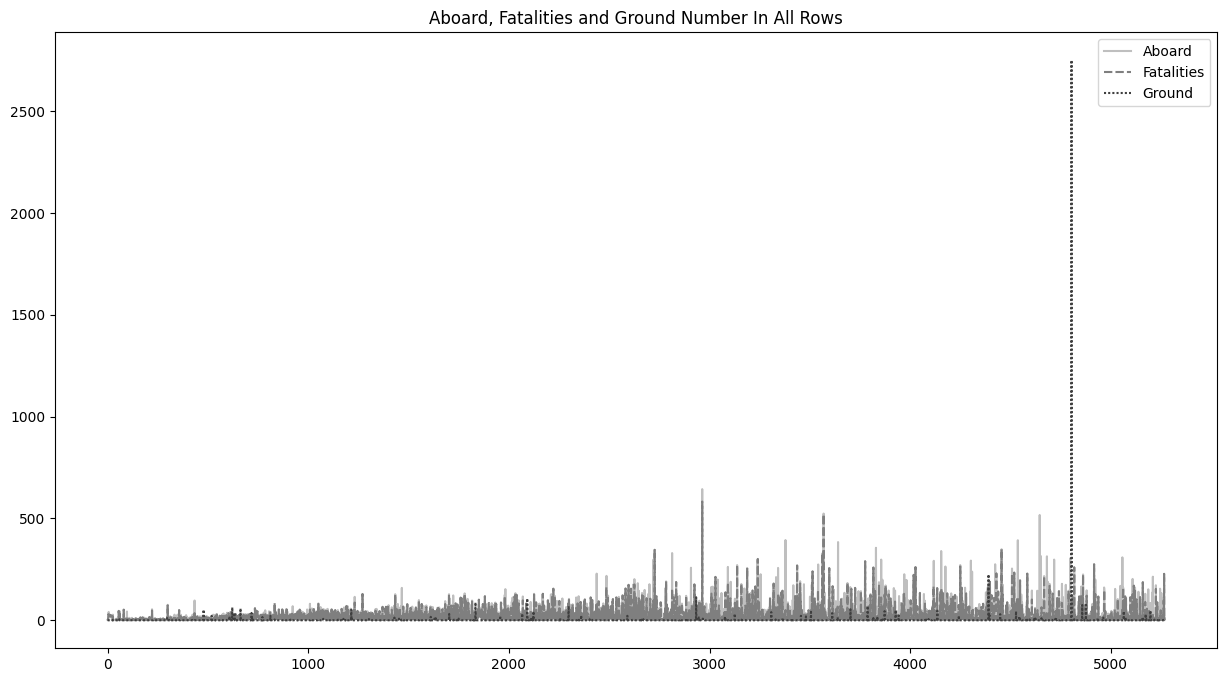

In [38]:
top10=df.iloc[:5269 , :]
top10u= top10.loc[:,['Aboard', 'Fatalities', 'Ground']]
print(top10u)
plt.figure(figsize=(15,8))
sns.lineplot(data=top10u,palette="binary")
plt.title('Aboard, Fatalities and Ground Number In All Rows')
plt.show

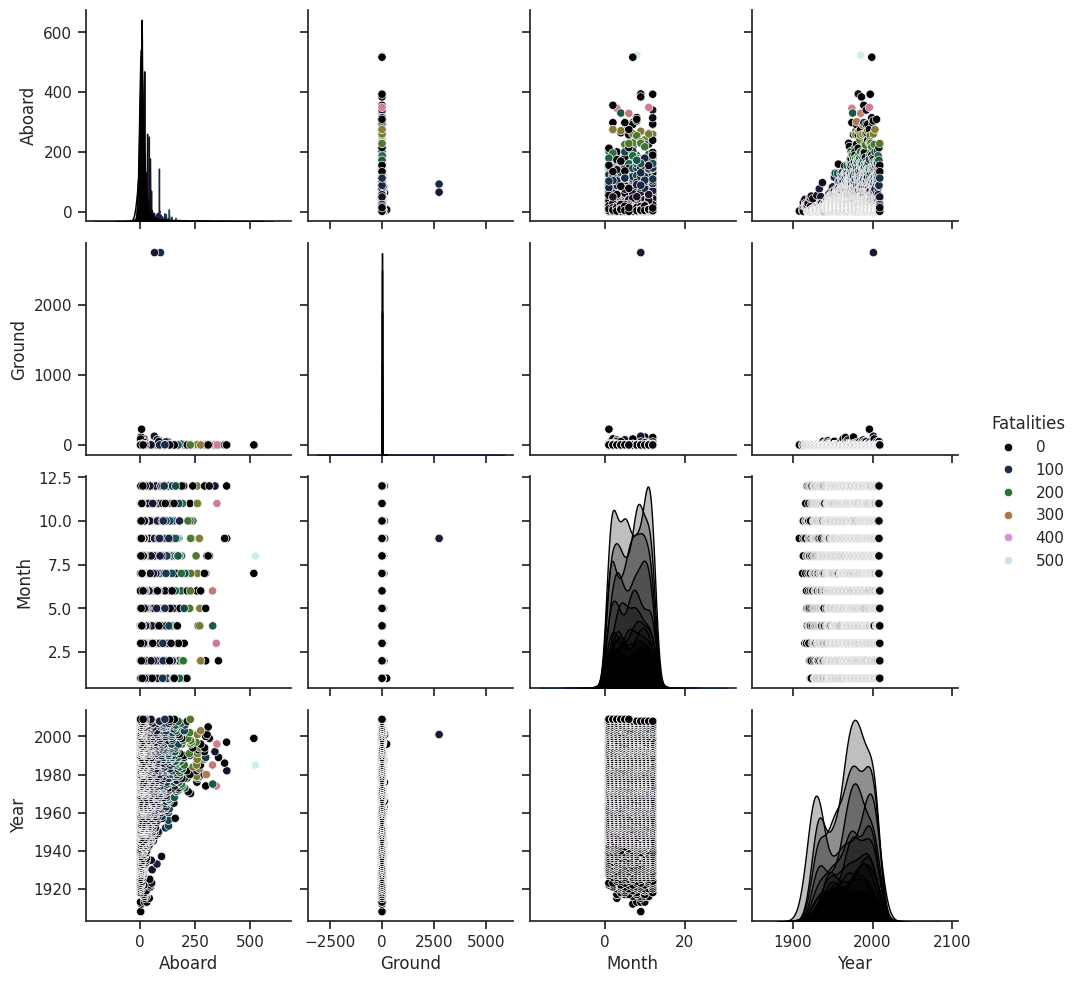

In [39]:
warnings.filterwarnings("ignore")
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, diag_kind='kde',hue="Fatalities", palette="cubehelix")
plt.show()

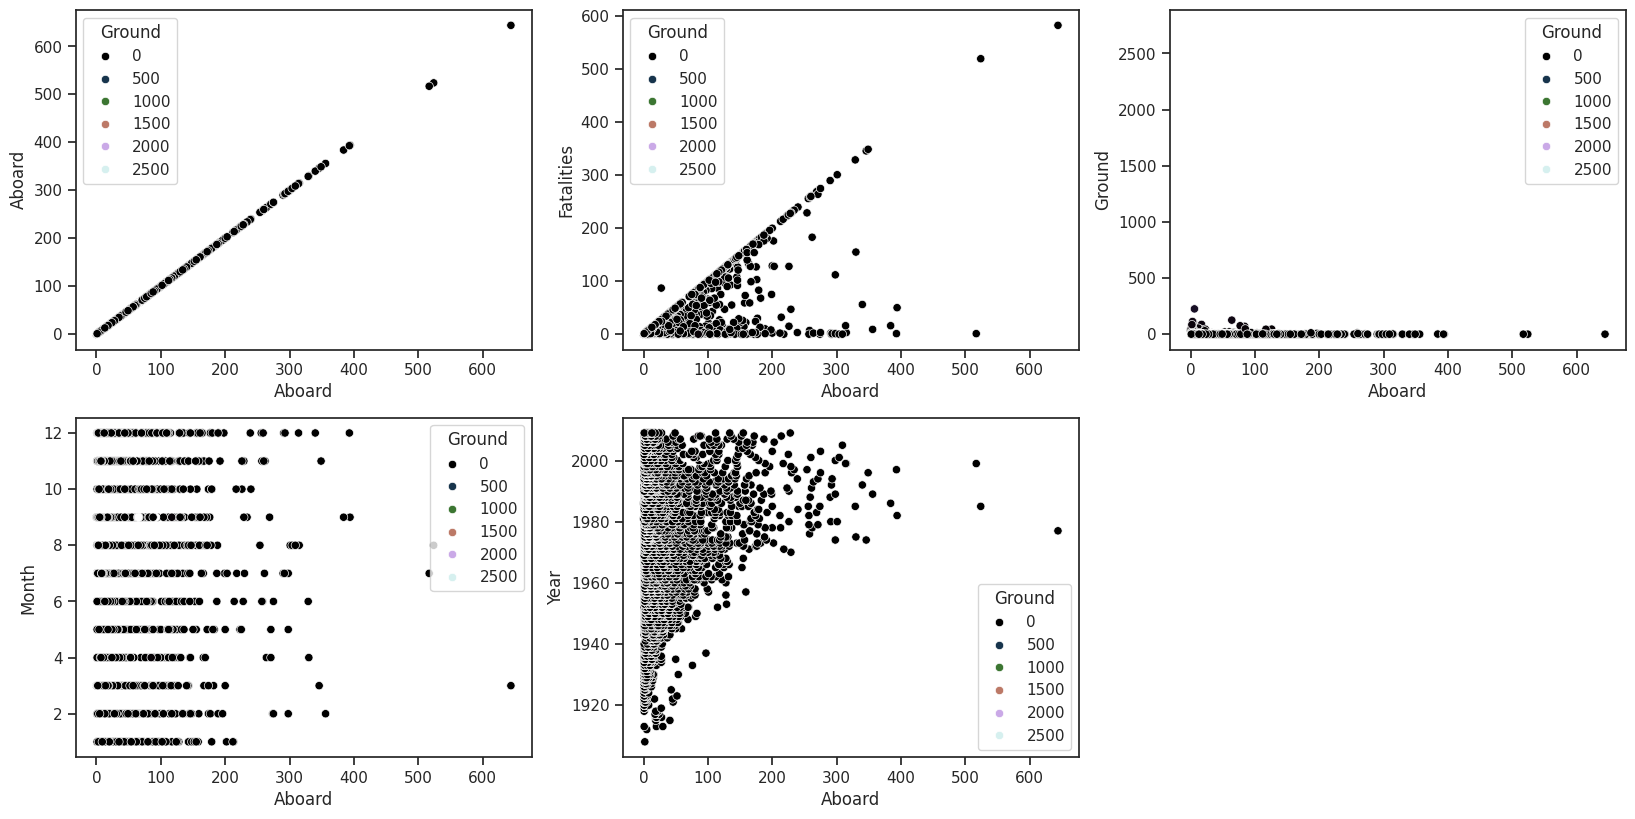

In [40]:
ff = ['Aboard', 'Fatalities', 'Ground','Month' ,'Year']
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='Aboard',y=col,hue='Ground',data=df,palette="cubehelix")

In [41]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
color_scale = ["#495057", "#adb5bd", "#ced4da", "#343a40"]
fig = px.scatter_3d(df, x='Fatalities', y='Ground', z='Aboard', color='Year',color_continuous_scale=color_scale,  title='Distribution of Kills',template = 'plotly_white')
fig.update_traces(marker=dict(size=5))
fig.show()

<Axes: >

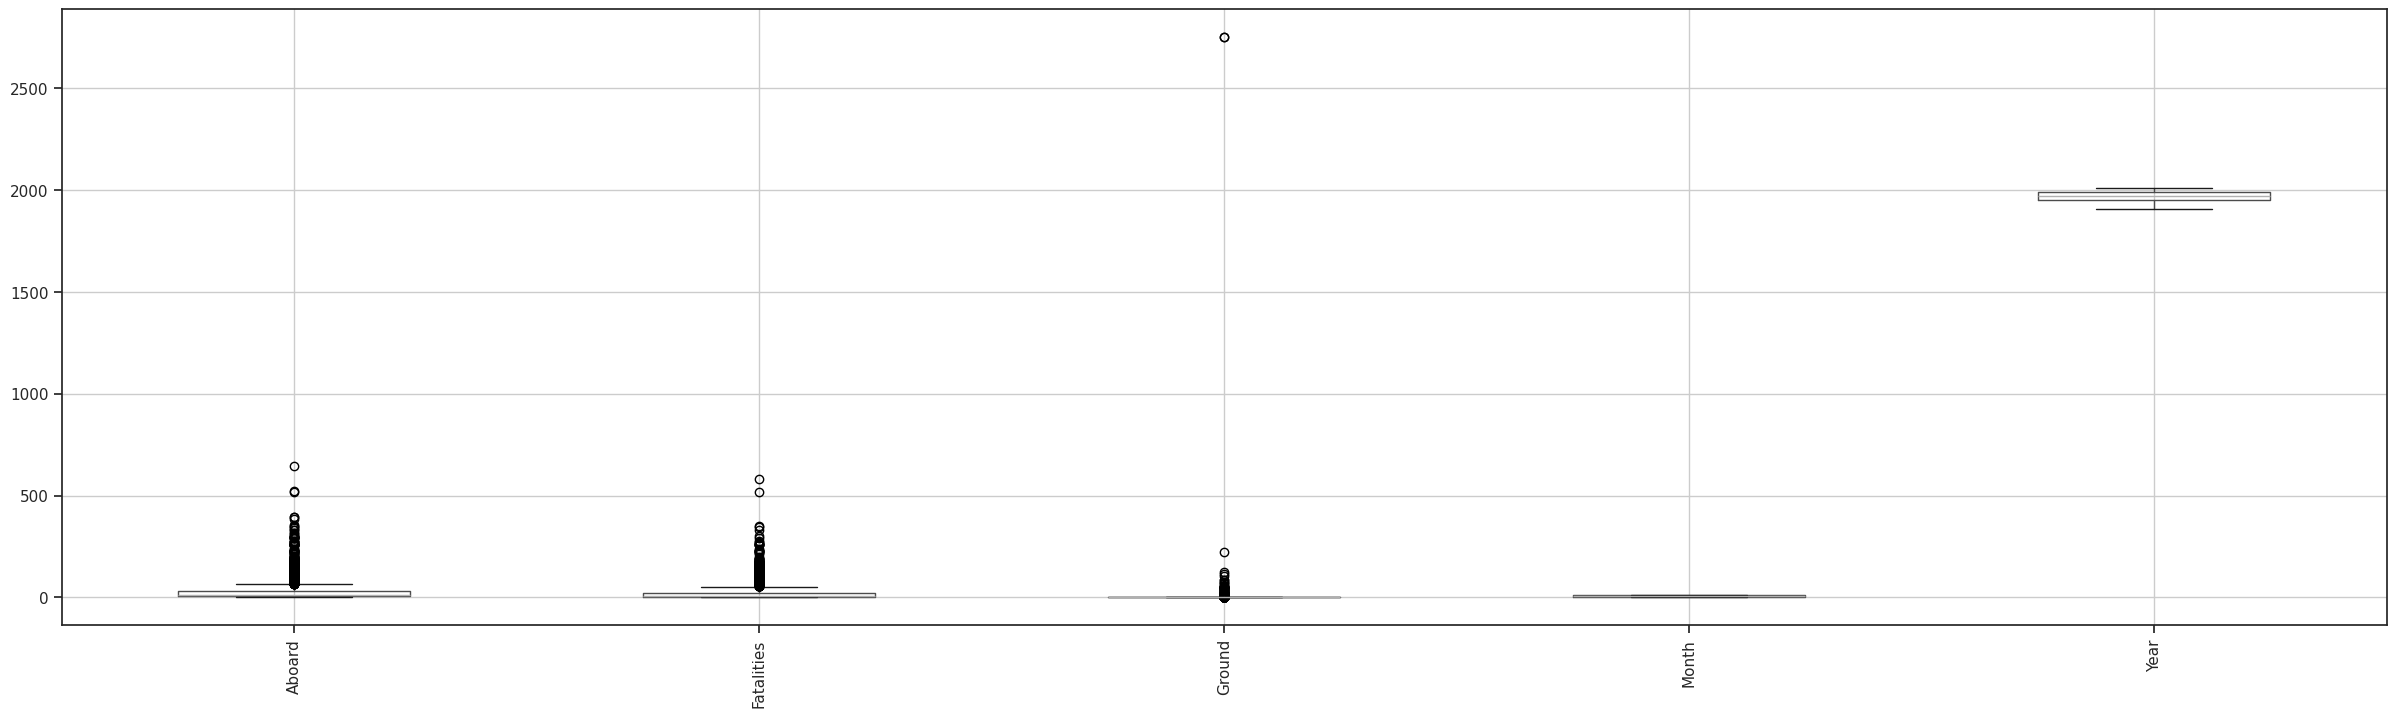

In [42]:
df.boxplot(rot=90 , figsize=(30,8))

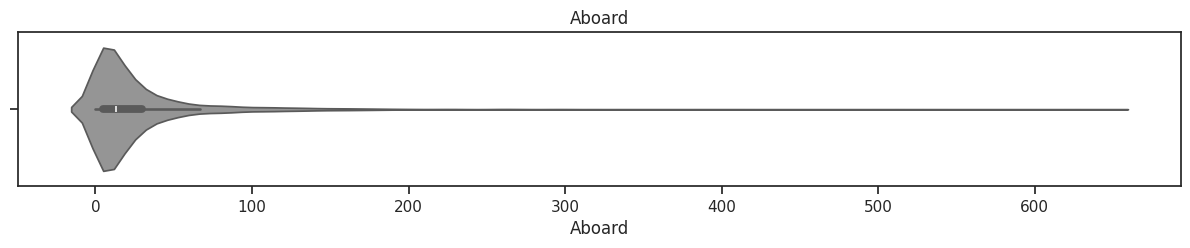

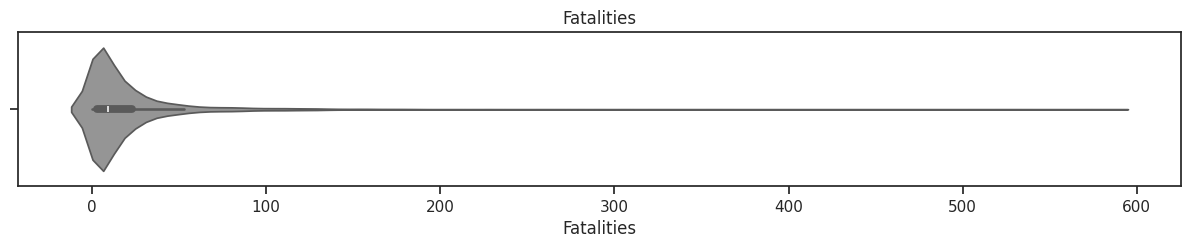

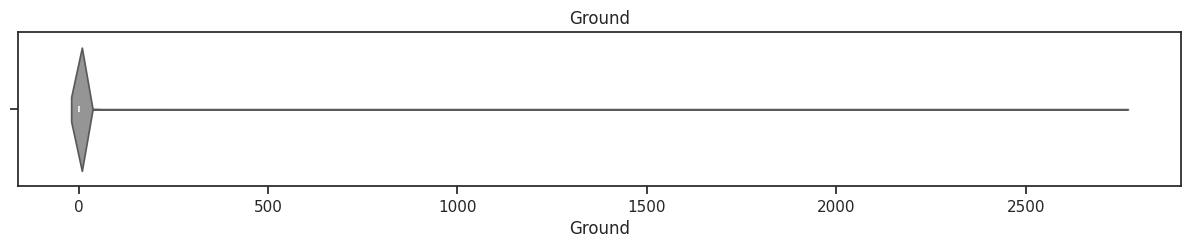

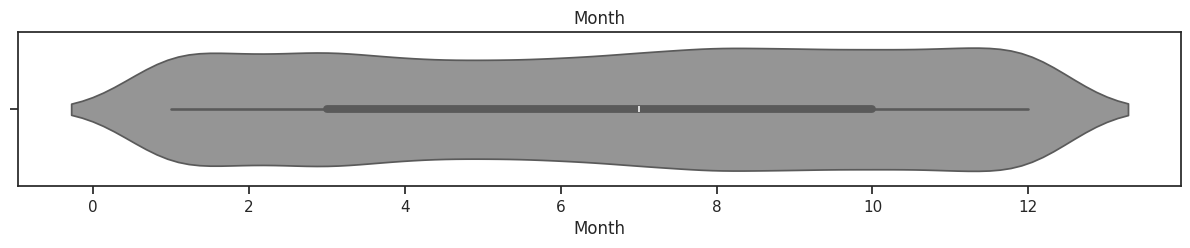

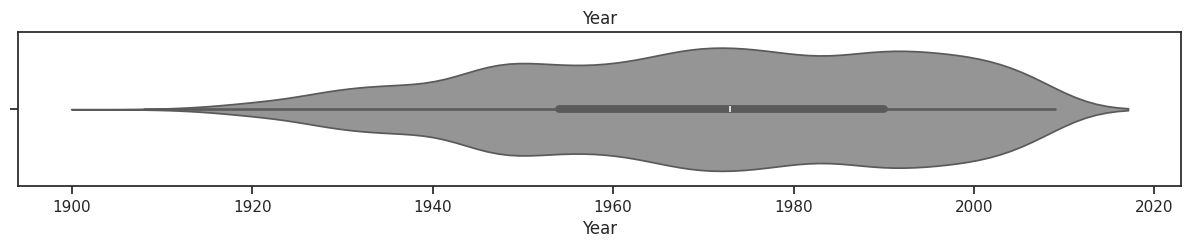

In [43]:
palette ="Greys"
for column in ff:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df[column], palette=palette)
    plt.title(column)
    plt.show()


Aboard Statistics:
count: 5268.00, mean: 27.55, std: 42.99, min: 0.00, 25%: 5.00, 50%: 13.00, 75%: 30.00, max: 644.00


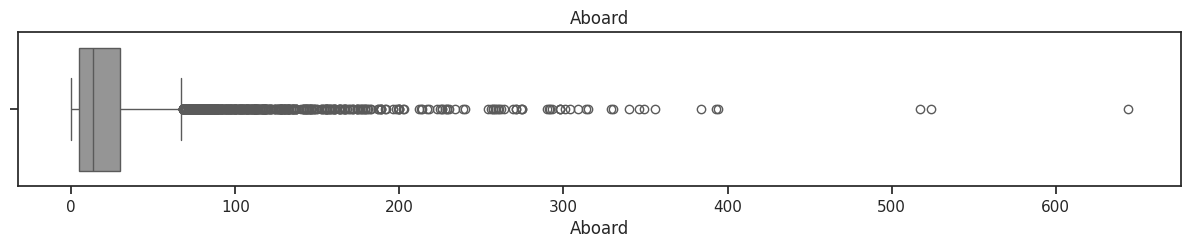


Fatalities Statistics:
count: 5268.00, mean: 20.07, std: 33.16, min: 0.00, 25%: 3.00, 50%: 9.00, 75%: 23.00, max: 583.00


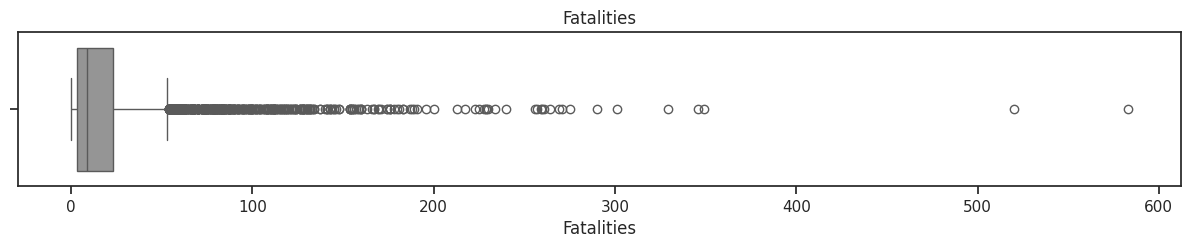


Ground Statistics:
count: 5268.00, mean: 1.61, std: 53.87, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 0.00, max: 2750.00


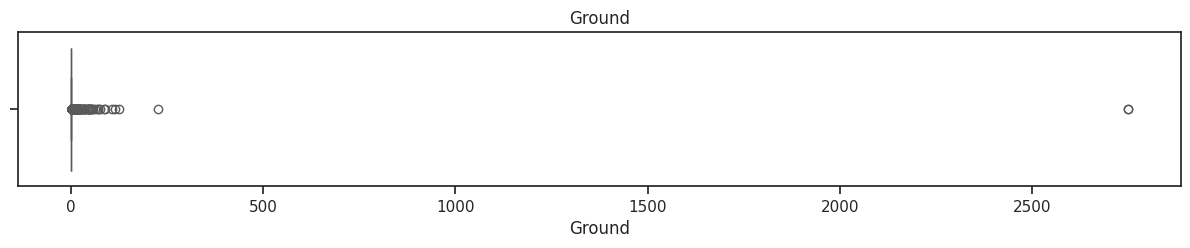


Month Statistics:
count: 5268.00, mean: 6.64, std: 3.55, min: 1.00, 25%: 3.00, 50%: 7.00, 75%: 10.00, max: 12.00


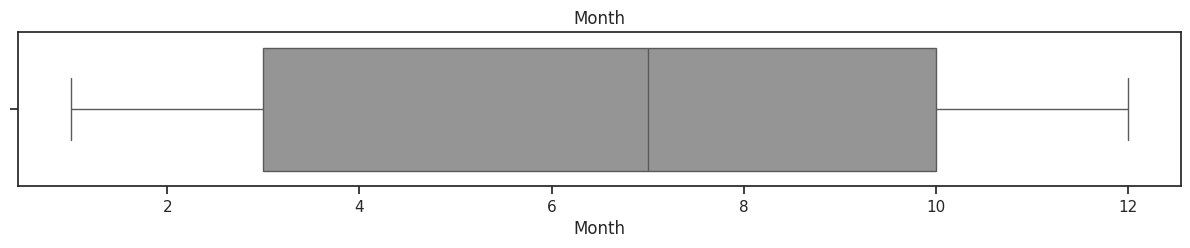


Year Statistics:
count: 5268.00, mean: 1971.30, std: 22.39, min: 1908.00, 25%: 1954.00, 50%: 1973.00, 75%: 1990.00, max: 2009.00


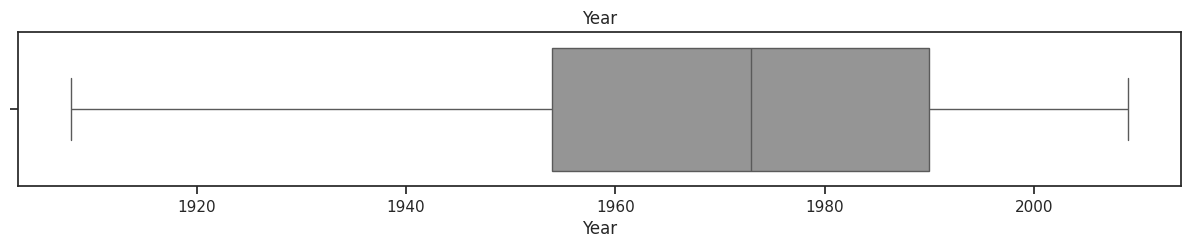

In [44]:

palette ="Greys"
for column in ff:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(column)
    stats = df[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()

In [45]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.line(data_frame=df, x='Date', y='Fatalities', title='Fatalities Based On Years', template='plotly_white')
fig.update_traces(line_color='#6c757d')
fig.show()

In [46]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.line(data_frame=df, x='Month', y='Fatalities', title='Fatalities Based On Month', template='plotly_white')
fig.update_traces(line_color='#6c757d')
fig.show()

In [47]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.histogram(df, x = 'Manufacture', template = 'plotly_white', title='Accidents by Manufacture',color_discrete_sequence=px.colors.sequential.gray)
fig.show()

In [48]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.histogram(df, x = 'Place', template = 'plotly_white', title='Accidents by Location',color_discrete_sequence=px.colors.sequential.gray)
fig.show()

In [49]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.bar(data_frame=df, x='Operator', title='Number of Incidents by Operator',  template='plotly_white',color_discrete_sequence=px.colors.sequential.gray)
fig.show()

In [50]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.histogram(df,x = 'Year', y = 'Ground', template = 'plotly_white', title='Ground Kills per year',color_discrete_sequence=px.colors.sequential.gray)
fig.show()

In [51]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.histogram(data_frame=df,x = 'Year' , y=['Fatalities','Aboard'],title='Kill Per Year',template='plotly_white',color_discrete_sequence=px.colors.sequential.ice)
fig.show()

In [52]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig1 = px.histogram(data_frame=df, x='Fatalities', title='Distribution of Fatalities', template='plotly_white',color_discrete_sequence=px.colors.sequential.gray)
fig1.show()

In [53]:
fig = px.histogram(df, x="Fatalities", marginal="box", nbins=20, hover_data=df[['Location']])
fig.update_traces(
    boxpoints='all',
    boxmean='sd',
    marker=dict(color='#212529'),
    selector=dict(type='box'))
fig.update_traces(
    marker_color='#212529',
    selector=dict(type='histogram'))
fig.update_layout(
    xaxis_title="Fatalities",
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',)
fig.show()

In [54]:
fig = px.histogram(df, x="Aboard", marginal="box", nbins=20, hover_data=df[['Location']])
fig.update_traces(
    boxpoints='all',
    boxmean='sd',
    marker=dict(color='#212529'),
    selector=dict(type='box'))
fig.update_traces(
    marker_color='#212529',
    selector=dict(type='histogram'))
fig.update_layout(
    xaxis_title="Aboard",
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',)
fig.show()

In [55]:
fig = px.histogram(df, x="Ground", marginal="box", nbins=20, hover_data=df[['Location']])
fig.update_traces(
    boxpoints='all',
    boxmean='sd',
    marker=dict(color='#212529'),
    selector=dict(type='box'))
fig.update_traces(
    marker_color='#212529',
    selector=dict(type='histogram'))
fig.update_layout(
    xaxis_title="Ground",
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',)
fig.show()

In [56]:
df2= df.set_index('Date')
df2.dropna(subset=['Fatalities', 'Aboard'], inplace=True)

In [57]:
rolling_mean = df2['Fatalities'].rolling(window=12).mean()
rolling_std = df2['Fatalities'].rolling(window=12).std()
decomposition = seasonal_decompose(df2['Fatalities'], model='additive', period=12)

In [58]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2.index, y=df2['Fatalities'], mode='lines', name='Original',line=dict(color='#dee2e6')))
fig.add_trace(go.Scatter(x=df2.index, y=rolling_mean, mode='lines', name='Rolling Mean', line=dict(color='#212529')))
fig.add_trace(go.Scatter(x=df2.index, y=rolling_std, mode='lines', name='Rolling Std', line=dict(color='#adb5bd')))
fig.update_layout(title='Statistics of Fatalities', xaxis_title='Time', yaxis_title='Fatalities', template='plotly_white')
fig.show()

In [59]:
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Scatter(x=df2.index, y=df2['Fatalities'], mode='lines', name='Original',line=dict(color='#e9ecef')), row=1, col=1)
fig.add_trace(go.Scatter(x=df2.index, y=decomposition.trend, mode='lines', name='Trend', line=dict(color='#dee2e6')), row=2, col=1)
fig.add_trace(go.Scatter(x=df2.index, y=decomposition.seasonal, mode='lines', name='Seasonal', line=dict(color='#adb5bd')), row=3, col=1)
fig.add_trace(go.Scatter(x=df2.index, y=decomposition.resid, mode='lines', name='Residual', line=dict(color='#6c757d')), row=4, col=1)
fig.update_layout(title='Seasonal Decomposition of Fatalities', xaxis_title='Time', yaxis_title='Component Value', template='plotly_white')
fig.show()

In [60]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
fig = px.scatter(df,
                 x='Year',y='Fatalities',size='Aboard', color='Manufacture',  hover_name='Location',
                 title='Year VS Fatalities VS People Aboard',
                 template='plotly_white',color_discrete_sequence=px.colors.sequential.Greys)
fig.show()

In [61]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
z = df2[['Aboard', 'Fatalities', 'Ground','Year','Month']].corr()
fig = px.imshow(z, text_auto=True,aspect="auto", color_continuous_scale='Greys')
fig.show()